In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('./archive/Airplane_Crashes_and_Fatalities_Since_1908.csv')

np.random.seed(42) 
obs, feat = Data.shape #Obs number of tuple while in feat number of columns 
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [2]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))
i = 1
for col in Data.columns:
    print(i, " - " + col)
    i += 1

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:
1  - Date
2  - Time
3  - Location
4  - Operator
5  - Flight #
6  - Route
7  - Type
8  - Registration
9  - cn/In
10  - Aboard
11  - Fatalities
12  - Ground
13  - Summary


In [3]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [2]:
#cleaning up by replacing the old incorrect value time with the new one
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '14:20')

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows (data and time)
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M') #select the format to display
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


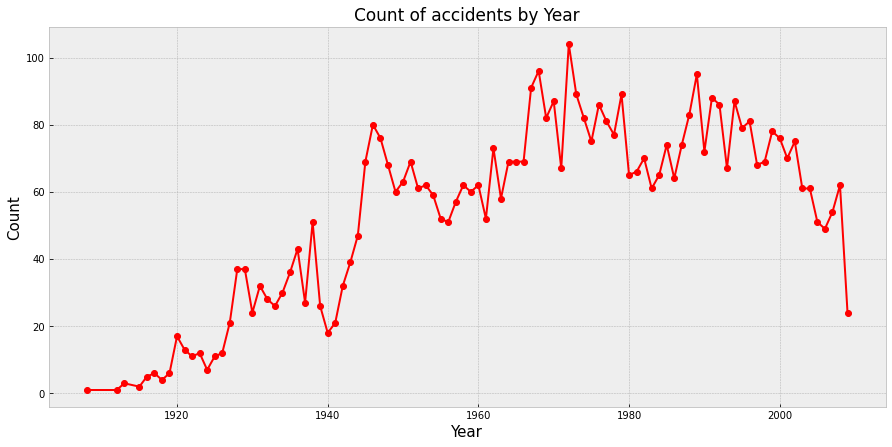

In [72]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame with only 1 column Date that contains, for every year, the counts of planes crashed
Temp = Temp.rename(columns={"Date": "Count"}) #Renaming the name of the only Date column into Count

plt.figure(figsize=(15,7))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='red', marker = "o", linewidth=2)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of accidents by Year', loc='Center', fontsize=17)
plt.show()

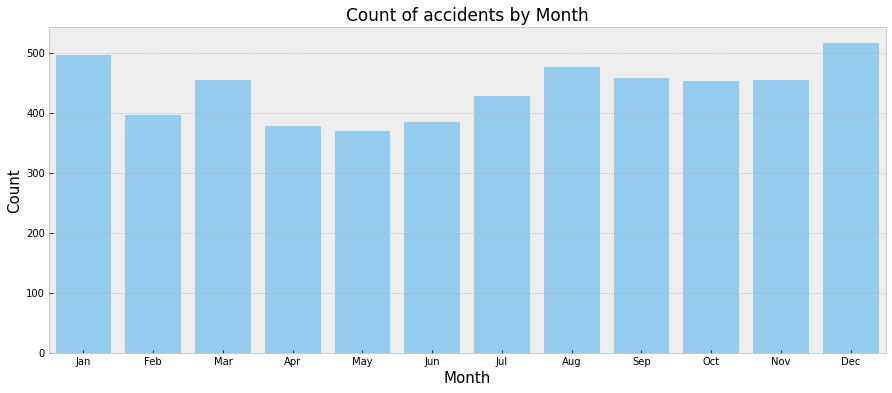

In [73]:
import matplotlib.pylab as pl

pl.figure(figsize=(15,6))
plt.style.use('seaborn-muted')
#Data.Time.dt.month From the date, get out the number of the month
sns.barplot(x = Data.groupby(Data.Time.dt.month)[['Date']].count().index, y = "Date", data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue')
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #Given the array with the number of month label, the second one substitute the first one with the name of the month
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of accidents by Month', loc='Center', fontsize=17)
plt.show()



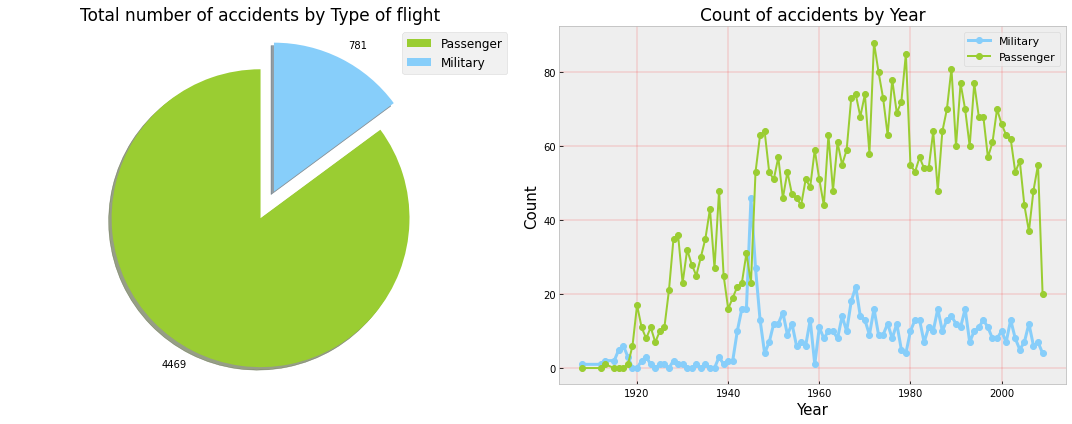

In [210]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']] # dataframe with Index Time Military Passenger
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero) # group by years omitting the null (false) count



colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90, shadow = True, explode={0.2, 0.0})
plt.legend(patches, Temp.index, loc="best", fontsize=12)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=17)

plt.subplot(1, 2, 2)
plt.grid(True, linewidth=0.2, color='#ff0000', linestyle='-')
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = "o", linewidth=3)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = "o", linewidth=2)
plt.legend(fontsize=11)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of accidents by Year', loc='Center', fontsize=17)
plt.tight_layout()
plt.show()

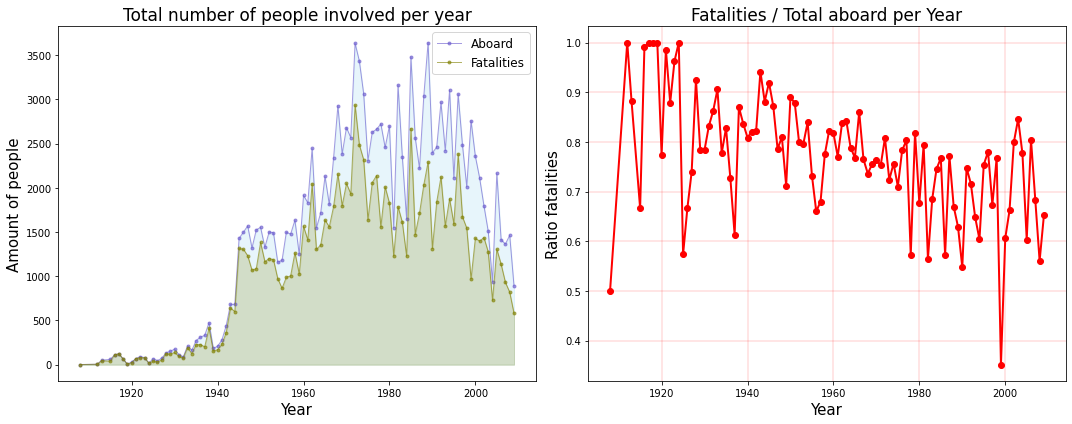

In [63]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Amount of people', fontsize=15)
plt.title('Total number of people involved per year', loc='Center', fontsize=17)

plt.subplot(1, 2, 2)
plt.grid(True, linewidth=0.2, color='#ff0000', linestyle='-')
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = "o", color = 'red', linewidth=2)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ratio fatalities', fontsize=15)
plt.title('Fatalities / Total aboard per Year', loc='Center', fontsize=17)
plt.tight_layout()
plt.show()

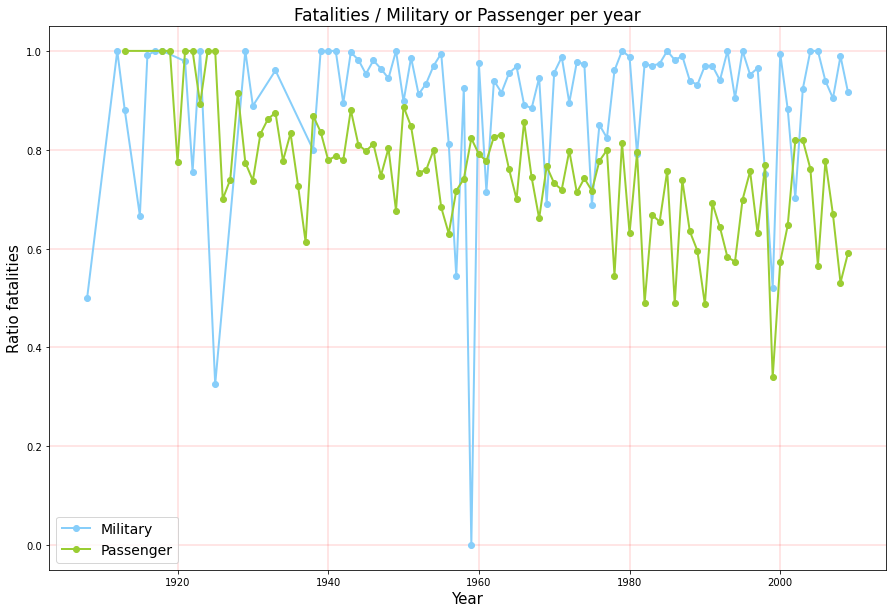

In [3]:
Temp2 = Data.copy()

Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger', 'Aboard', 'Fatalities']]
Temp2 = Temp2.groupby([Temp2.Time.dt.year,'Military', 'Passenger']).sum()[["Aboard", 'Fatalities']]

Temp2["Proportion"] = Temp2[["Fatalities"]]["Fatalities"] / Temp2[["Aboard"]]["Aboard"]

plt.figure(figsize=(15,10))
plt.grid(True, linewidth=0.2, color='#ff0000', linestyle='-')
plt.plot(Temp2.loc[Temp2.index.get_level_values(1)].index.get_level_values(0), "Proportion", data=Temp2.loc[Temp2.index.get_level_values(1)], color='lightskyblue', marker = "o", linewidth=2)
plt.plot(Temp2.loc[Temp2.index.get_level_values(2)].index.get_level_values(0), "Proportion", data=Temp2.loc[Temp2.index.get_level_values(2)], color = 'yellowgreen', marker = "o", linewidth=2)
plt.legend(["Military", "Passenger"], fontsize=14)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ratio fatalities', fontsize=15)
plt.title('Fatalities / Military or Passenger per year', loc='Center', fontsize=17)
plt.show()
